# noisyduck

## Tutorial 2: Swirling Radial Equilibrium Flow in a Cylindrical Annulus

Here we use noisyduck to analyze the case of swirling mean flow in radial equilibrium in a cylindrical annulus. We don't have analytical solutions for this case, but there are a number of authors who have reported results which we can compare against.

$\bar{v}_z = M = 0.3, \quad \bar{v}_\theta = \Gamma/r,  \quad  \Gamma=2,   \quad  \bar{p} = \frac{1}{\gamma} + \frac{\Gamma^2}{2}\left(1 - \frac{1}{r^2}\right)$

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import noisyduck as nd

For this particular mean flow condition, authors have reported using different distributions of density. In this example, we use a homentropic profile that is consistent with Kousen and Nijbour.

$\rho = \left(1 + \frac{\Gamma^2}{2}(\gamma-1)\left(1 - \frac{1}{r^2}\right)\right)^{\frac{1}{\gamma-1}}$

In [17]:
# Geometry
res = 50 ; ri = 0.4 ; ro = 1.0
r = np.linspace(ri,ro,res)

# Define mean state
GAMMA=0.2; gam=1.4; vr=0.; vt=GAMMA/r; vz=0.3
p = (1./gam) + (GAMMA*GAMMA/2.)*(1. - 1./(r*r))

# Homentropic density: consistent with Kousen, Nijbour
rho = (1. + GAMMA*GAMMA*(gam-1.)*(1. - 1./(r*r))/2.)**(1./(gam-1.))

# Define circumferential and temporal wavenumber
omega=-10.; m=2

With the geometry and mean flow state defined, the numerical eigendecomposition is computed. The decomposition is computed twice; once without filtering and once with filtering so we can compare their eigenspectra.

In [5]:
evals_r, evecs_rl, evecs_rr = nd.annulus.numerical.decomposition(omega,m,r,rho,vr,vt,vz,p,gam,filter='None',perturb_omega=True)
evals_f, evecs_fl, evecs_fr = nd.annulus.numerical.decomposition(omega,m,r,rho,vr,vt,vz,p,gam,filter='acoustic',alpha=0.00001,perturb_omega=True)

rho_evecs = evecs_fr[0*res:1*res,:]
vr_evecs  = evecs_fr[1*res:2*res,:]
vt_evecs  = evecs_fr[2*res:3*res,:]
vz_evecs  = evecs_fr[3*res:4*res,:]
p_evecs   = evecs_fr[4*res:5*res,:]

Here, we will compare the eigenvalues from the numerical decomposition against reported values by Nijbour.

    Nijbour, "Eigenvalues and Eigenfunctions of Ducted Swirling Flows", 7th AIAA/CEAS Aeroacoustics Conference, AIAA 2001-2178.

Data was extracted from the conference paper using the online tool WebPlotDigitizer: https://automeris.io/WebPlotDigitizer/

In [6]:
eigenvalues_nijbour = np.array([[-3.027340779492441,  48.36867862969005  ],
                                [-3.061040170507461,  42.82218597063621  ],
                                [-3.062863166930221,  37.11256117455139  ],
                                [-3.0646340777409034, 31.56606851549755  ],
                                [-3.066509159775743,  25.693311582381725 ],
                                [-3.0683842418105804, 19.8205546492659   ],
                                [-3.0703634950695786, 13.621533442088094 ],
                                [-3.008902472816523,  6.117455138662315  ],
                                [-3.0128609793345174,-6.280587275693314  ],
                                [-3.0471333120824085,-13.621533442088094 ],
                                [-3.0810931311578234,-19.9836867862969   ],
                                [-3.0830202988047404,-26.019575856443723 ],
                                [-3.0848432952275022,-31.729200652528547 ],
                                [-3.054737811445923, -37.438825448613386 ],
                                [-3.056508722256604, -42.98531810766721  ],
                                [-3.058331718679364, -48.694942903752036 ],
                                [-9.939361930417792, -0.08156606851550663],
                                [-12.940639069625966,-0.08156606851550663],
                                [3.9814554386754395, -0.08156606851550663],
                                [6.695376256044533,  -0.08156606851550663]])

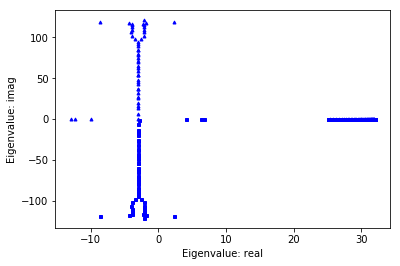

In [18]:
fig = plt.figure()
# Plot raw numerical eigenvalues
for i in range(len(evals_r)):
    if (evals_r[i].imag > 0.):
        plt.plot(evals_r[i].real,evals_r[i].imag, 'b^',markersize=3)
    elif (evals_r[i].imag < 0.):
        plt.plot(evals_r[i].real,evals_r[i].imag, 'bs',markersize=3)
l = plt.xlabel('Eigenvalue: real')
l = plt.ylabel('Eigenvalue: imag')

Here we plot the filtered numerical eigenvalue spectrum against the data extracted from Nijbour. There are some subtle differences in the eigenvalues, which were found to be due to the lack of a term 

$\frac{\partial v_\theta}{\partial r} v_r'$

that contributes to the residual of the equation for $v_\theta$.

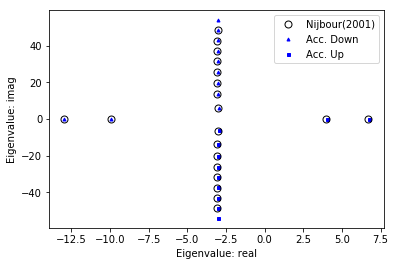

In [19]:
# Plot filtered numerical eigenvalues
for i in range(len(evals_f)):
    if (evals_f[i].imag > 0.):
        h_up, = plt.plot(evals_f[i].real,evals_f[i].imag,   'b^',markersize=3, label='Acc. Down')
    elif (evals_f[i].imag < 0.):
        h_down, = plt.plot(evals_f[i].real,evals_f[i].imag, 'bs',markersize=3, label='Acc. Up'  )
# Plot analytical eigenvalues
h_analytical, = plt.plot(eigenvalues_nijbour[:,0],eigenvalues_nijbour[:,1], 'ko', markerfacecolor='None',markersize=7,label='Nijbour(2001)')
l=plt.legend(handles=[h_analytical,h_up,h_down],numpoints=1)
l = plt.xlabel('Eigenvalue: real')
l = plt.ylabel('Eigenvalue: imag')

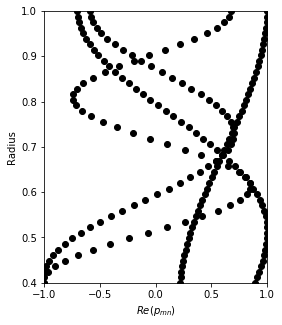

In [21]:
# Plot first 4 eigenvectors of pressure, normalized by maximum value
fig = plt.figure(figsize=(4,5))
for i in range(4):
    loc = np.argmax(np.abs(p_evecs[:,2*i]))
    plt.plot(p_evecs[:,2*i].real/np.max(np.abs(p_evecs[loc,2*i].real)),r, 'ko')
l=plt.xlim((-1,1))
l=plt.ylim((0.4,1.0))
l=plt.xlabel('$Re(p_{mn})$')
l=plt.ylabel('Radius')